# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs2/20250309_sparc4acs2_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs2/20250309_s4c2_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs2/20250309_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs2/20250309_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs2/20250309_s4c2_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:10:48.017000,8.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,1,L2,None,True
1,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:10:56.021499,8.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,1,L2,None,True
2,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:11:06.602000,8.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,2,L2,None,True
3,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:11:14.606499,8.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,2,L2,None,True
4,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:11:25.012000,8.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,3,L2,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T08:46:17.619827,0.3,12:38:16.18,-38:42:45.0,DOMEFLAT,FLAT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,16,L4,None,True
1348,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T08:46:19.039889,0.3,12:38:16.18,-38:42:45.0,DOMEFLAT,FLAT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,16,L4,None,True
1349,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T08:46:20.459952,0.3,12:38:16.18,-38:42:45.0,DOMEFLAT,FLAT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,16,L4,None,True
1350,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T08:46:21.880015,0.3,12:38:16.18,-38:42:45.0,DOMEFLAT,FLAT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,16,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs2/20250309_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   91R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   91R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   91R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   91R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   91R x 13C   [I11, D25.17,

Then we plot the science frame using the `sparc4.product_plots` library

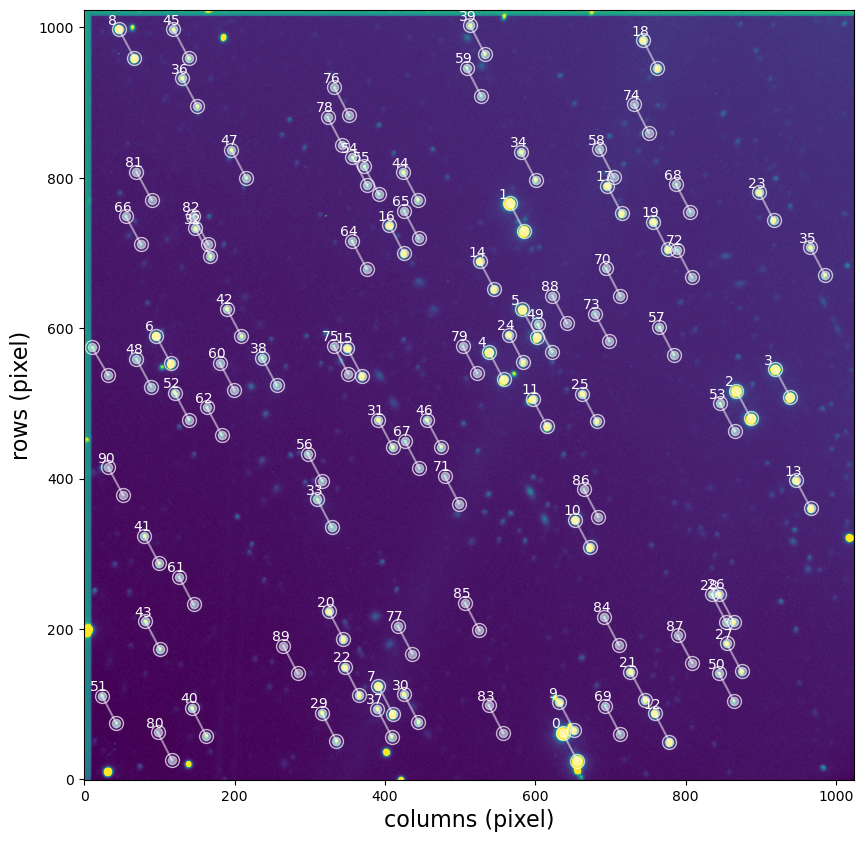

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.553058,-38.759825,656.005306,24.456406,5.562414,5.562414,-11.594076,0.000579,-9.863450,0.000429,10,0
1,1,189.564739,-38.693957,585.135806,729.462688,5.429821,5.429821,-11.173989,0.000740,-9.896484,0.000466,10,0
2,2,189.527376,-38.716324,886.795840,479.971379,5.521164,5.521164,-11.060897,0.000793,-9.895162,0.000507,10,0
3,3,189.521273,-38.713438,938.703561,508.767611,5.466652,5.466652,-10.449287,0.001156,-9.900382,0.000451,10,0
4,4,189.567131,-38.712633,557.734515,531.863543,5.542498,5.542498,-10.077897,0.001517,-9.887010,0.000608,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,86,189.551170,-38.729340,683.702679,348.988610,5.335742,5.335742,-5.581802,0.064723,-9.877587,0.000391,10,0
87,87,189.535302,-38.747090,808.739248,154.665338,5.293334,5.293334,-5.589971,0.064684,-9.872441,0.000427,10,0
88,88,189.557349,-38.705313,641.933233,606.641215,5.372990,5.372990,-5.827055,0.053312,-9.895913,0.000467,10,0
89,89,189.598262,-38.750256,284.144772,140.770606,5.307640,5.307640,-5.439000,0.073333,-9.852781,0.000416,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

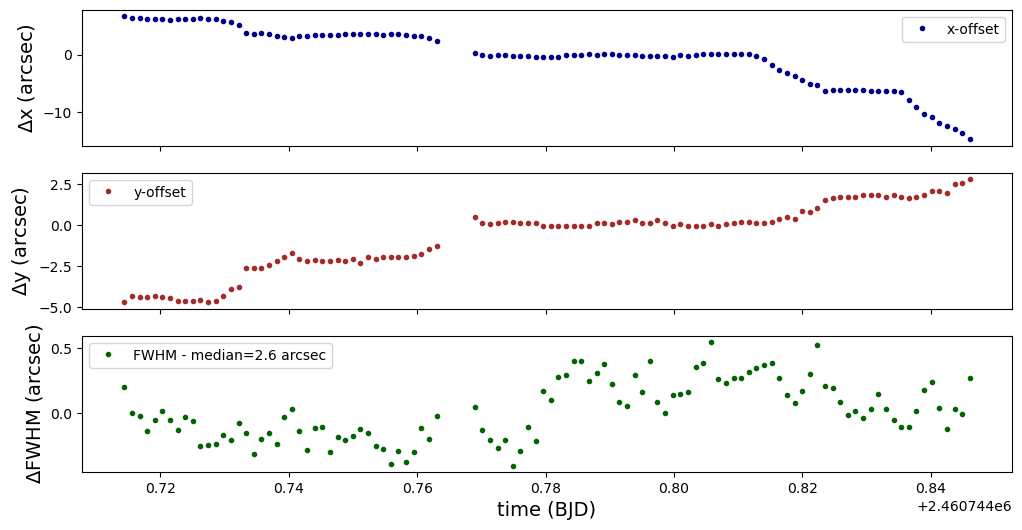

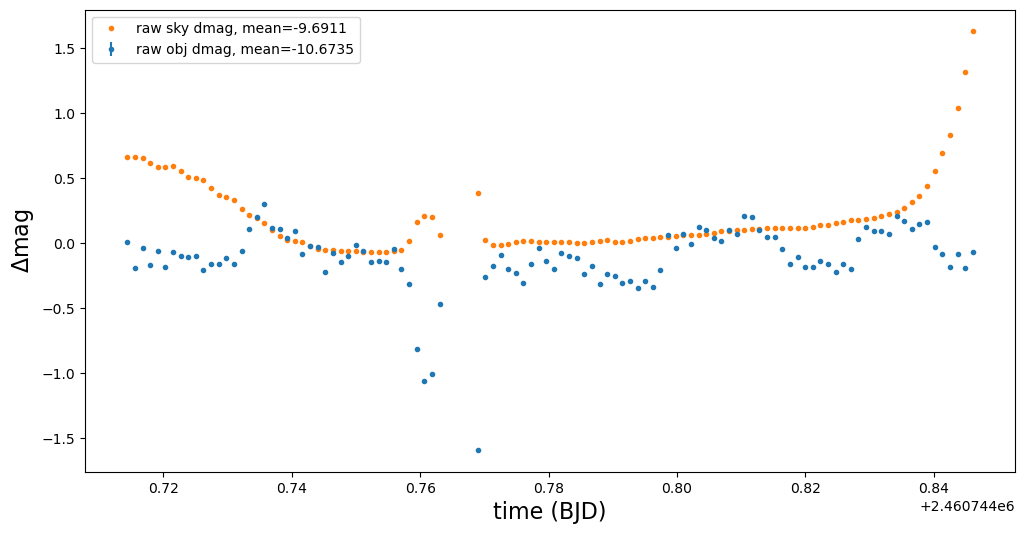

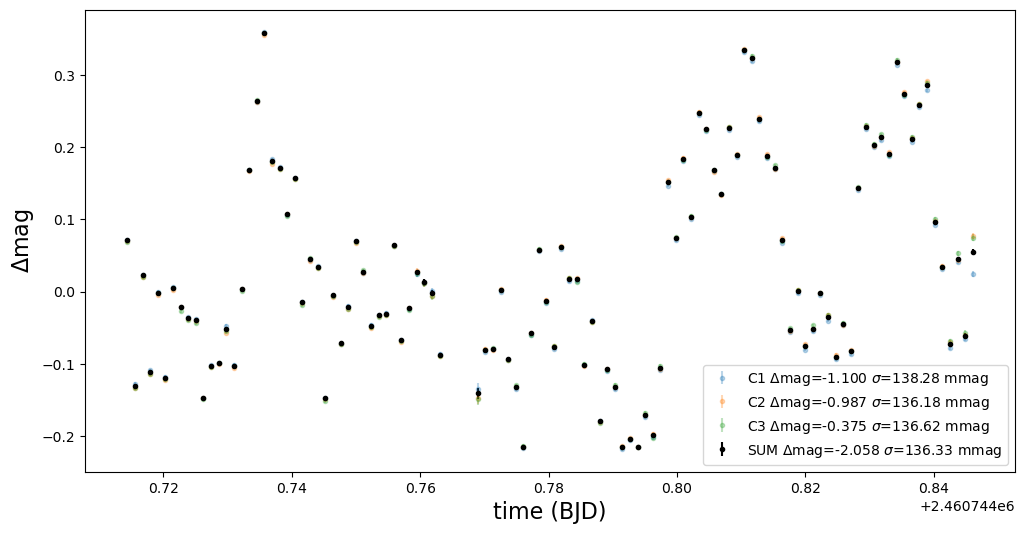

       TIME                x          ...       diffmagsum      
------------------ ------------------ ... ----------------------
 2460744.714380617  548.1737931160422 ...    0.07075334752118412
2460744.7155662677  547.1737931160422 ...   -0.13026958719474724
2460744.7167515364  547.1737931160422 ...   0.022515470947522154
2460744.7179377424  546.4237931160422 ...   -0.11134929215165723
 2460744.719124354  546.4237931160422 ... -0.0012928875284101693
2460744.7203100394  546.4237931160422 ...   -0.11954672489842988
 2460744.721495273  546.1737931160422 ...   0.005286241273876335
               ...                ... ...                    ...
 2460744.838946007 497.17379311604225 ...      0.286269397943399
2460744.8401336013 495.42379311604225 ...    0.09691979184940802
2460744.8413174455 492.42379311604225 ...    0.03468129448679047
 2460744.842504125 490.92379311604225 ...   -0.07209064636821427
2460744.8436894277 489.17379311604225 ...   0.045173058561316815
 2460744.844879314 486.92

In [7]:
catalog = 'CATALOG_PHOT_AP010'
target=4
comps=[1,2,3]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [8]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs2/20250309_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     675   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU    946   91R x 467C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [9]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

Then we can print all column names to check the data available in each catalog

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0105', 'EFE0105', 'FO0106', 'EFO0106', 'FE0106', 'EFE0106', 'FO0107',
       'EFO0107', 'FE0107', 'EFE0107'],
      dtype='object', length=467)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 01:00:47,942 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 01:00:47,942 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-18 01:00:47,951 root - INFO - Source index: i=4   [pipeline_lib]


2025-09-18 01:00:47,951 | INFO | Source index: i=4 


2025-09-18 01:00:47,952 root - INFO - Source RA=189.56713057754584 Dec=-38.71263267341302 mag=-15.7269+-0.0002  [pipeline_lib]


2025-09-18 01:00:47,952 | INFO | Source RA=189.56713057754584 Dec=-38.71263267341302 mag=-15.7269+-0.0002


2025-09-18 01:00:47,953 root - INFO - Best aperture radius: 8.0 pixels  [pipeline_lib]


2025-09-18 01:00:47,953 | INFO | Best aperture radius: 8.0 pixels


2025-09-18 01:00:47,954 root - INFO - Polarization in Q: -0.0067+-0.0005  [pipeline_lib]


2025-09-18 01:00:47,954 | INFO | Polarization in Q: -0.0067+-0.0005


2025-09-18 01:00:47,955 root - INFO - Polarization in U: -0.0004+-0.0009  [pipeline_lib]


2025-09-18 01:00:47,955 | INFO | Polarization in U: -0.0004+-0.0009


2025-09-18 01:00:47,956 root - INFO - Polarization in V: 0.0001+-0.0005  [pipeline_lib]


2025-09-18 01:00:47,956 | INFO | Polarization in V: 0.0001+-0.0005


2025-09-18 01:00:47,957 root - INFO - Total linear polarization p: 0.0068+-0.0005  [pipeline_lib]


2025-09-18 01:00:47,957 | INFO | Total linear polarization p: 0.0068+-0.0005


2025-09-18 01:00:47,957 root - INFO - Angle of polarization theta: 92+-2 deg  [pipeline_lib]


2025-09-18 01:00:47,957 | INFO | Angle of polarization theta: 92+-2 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 01:00:47,959 root - INFO - Free constant k: 1.2308110690716711+-0.0  [pipeline_lib]


2025-09-18 01:00:47,959 | INFO | Free constant k: 1.2308110690716711+-0.0


2025-09-18 01:00:47,960 root - INFO - Zero of polarization: 27.2+-0.0  [pipeline_lib]


2025-09-18 01:00:47,960 | INFO | Zero of polarization: 27.2+-0.0


2025-09-18 01:00:47,961 root - INFO - RMS of zi residuals: 0.003729597977810282  [pipeline_lib]


2025-09-18 01:00:47,961 | INFO | RMS of zi residuals: 0.003729597977810282


2025-09-18 01:00:47,961 root - INFO - Reduced chi-square (n=108.0, DOF=105.0): 4.71  [pipeline_lib]


2025-09-18 01:00:47,961 | INFO | Reduced chi-square (n=108.0, DOF=105.0): 4.71


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-09-18 01:00:48,048 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:00:48,048 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:00:48,052 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:00:48,052 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:00:48,271 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:00:48,271 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:00:48,276 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:00:48,276 | INFO | Substituting symbol \perp from STIXGeneral


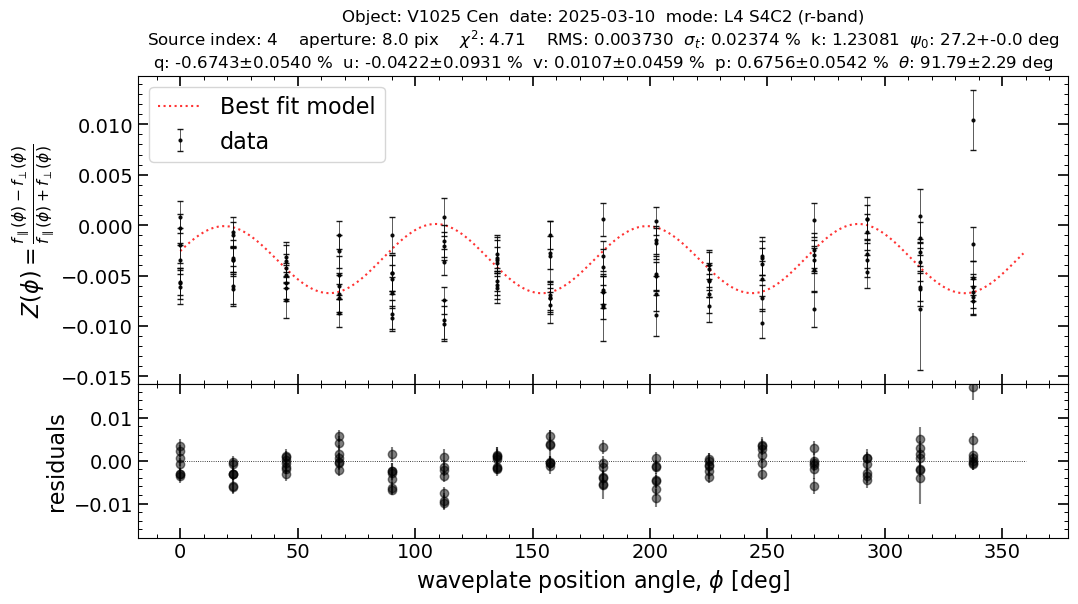

In [11]:
source_index = 4

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [12]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs2/20250309_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 4
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 2
APERTURE_RADIUS : 8.0
NEXPS : 108
MAG : -15.7269+-0.0002
RA : 189.56713057754584
DEC : -38.71263267341302
FWHM : 5.60893022557563
X1 : 538.61307079904
Y1 : 568.2207083113809
X2 : 557.7345154330445
Y2 : 531.8635429439471
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [13]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.68+-0.05 %  Angle of polarization: 92+-2 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [14]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [15]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

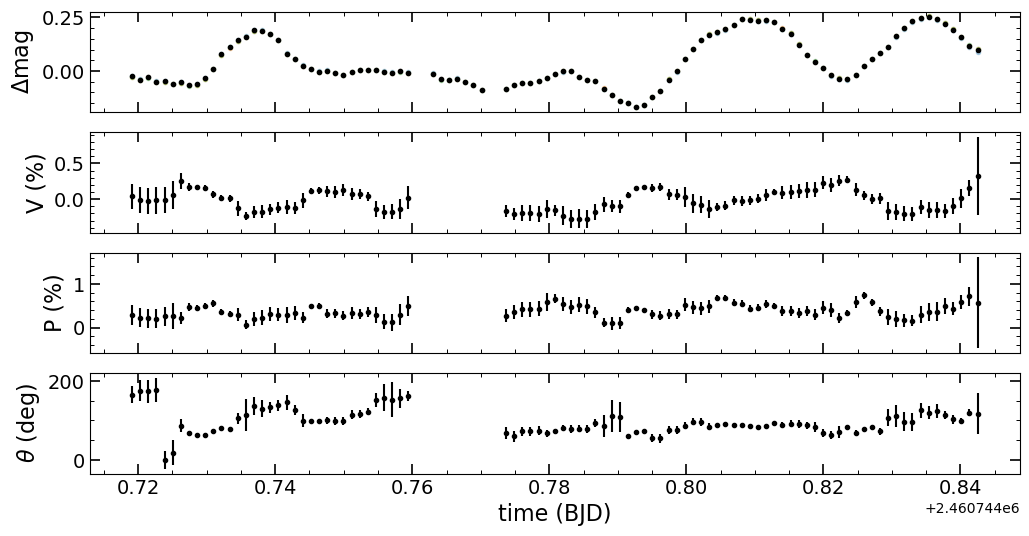

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.022768151336222786,0.0008738001596507533,-0.027265610263205176,0.0008870965047012736,-0.027596044416888788,0.000999488262335694,2460744.7191102607,538.61307079904,568.2207083113809,557.7345154330445,531.8635429439471,5.522160719135971,-12.935197688451805,0.0008159522010545017,-15.02647919579378,0.0007430408676436752,-0.025743896176578573,0.0029712008299362927,0.002310087032024087,165.69996949970587,22.236291956510225
-0.03684293303140507,0.0008765369052087264,-0.041482967984627805,0.000889714844405102,-0.0418227268982605,0.0010006903762988621,2460744.7202957557,537.61307079904,569.4707083113809,556.7345154330445,533.1135429439471,5.455062895954944,-12.920011254484287,0.0008193625081445943,-15.025453135880028,0.0007397472004041945,-0.03990427023034471,0.0022560440932278634,0.00214013511339345,175.61619676930786,27.13061523344553
-0.025995537087602827,0.0008628077119852753,-0.030339015849259354,0.0008758944585593266,-0.031034200886532304,0.0009867763218324543,2460744.7214813195,537.61307079904,569.2207083113809,556.7345154330445,532.8635429439471,5.420825495589864,-12.930711107441342,0.0008054323860505262,-15.025207265914947,0.0007342967889268326,-0.028958547308208793,0.0021296035859650992,0.002167821757722737,174.46577641246594,29.11325970686375
-0.04717208228044001,0.0008701405021200161,-0.051100520494316015,0.0008830922940565655,-0.052049500471952115,0.0009918577240357386,2460744.722667902,536.86307079904,569.2207083113809,555.9845154330445,532.8635429439471,5.4064043081546265,-12.909311503905831,0.0008139563838996478,-15.02479481511658,0.0007302076782040464,-0.04994570004535248,0.0020644831876014116,0.002195792112716787,177.98403618325852,30.419067978297726
-0.04634286195201298,0.0008609406870456014,-0.04999134459751886,0.0008739889429068604,-0.050879373901528524,0.0009823234934565736,2460744.723853859,536.86307079904,569.4707083113809,555.9845154330445,533.1135429439471,5.376915994892178,-12.910336027397353,0.0008050774984208913,-15.024813020656783,0.0007249728611057171,-0.04893938209403359,0.0025923537559266203,0.00212611132540126,0.3200692966250588,23.4562060704331
-0.05883334653959871,0.0008598865196094036,-0.062187048949386536,0.0008727139126328868,-0.0632081530861992,0.0009795133314891926,2460744.7250393247,536.86307079904,569.2207083113809,555.9845154330445,532.8635429439471,5.34885567262925,-12.898268031724303,0.0008048403171132593,-15.025090995394503,0.0007191501639582075,-0.061285352504803825,0.0025957693232356712,0.0029671688194438345,18.48048190539171,32.6920529788498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.2510153598668392,0.0006662673751075077,0.25501770760057063,0.0006819445713325949,0.25473792527426653,0.0008056691255727486,2460744.835371609,499.61307079904,587.7207083113809,518.7345154330445,551.3635429439471,5.557031044460626,-13.16236177596956,0.0005975043178935543,-14.97487277646962,0.0006978747192007155,0.2530266106653354,0.003588184218528895,0.002084019522300229,119.63392347814754,16.610896962871912
0.2388546366901334,0.0006833784182102326,0.24326962115692652,0.0006993474229100397,0.24300009607192585,0.000825201997572458,2460744.8365580635,499.61307079904,587.7207083113809,518.7345154330445,551.3635429439471,5.611330198184559,-13.148481126858186,0.00061429306486669,-14.97290950942592,0.000710621776034252,0.24110922859766326,0.0036557068245028413,0.002237828040289081,123.54201756161149,17.507389138343083


In [16]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=4, 
                             comps=[1,2,3], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)